Training Progress:
   Epoch  Train Acc  Val Acc
0      0     0.4875   0.3456
1      1     0.6512   0.7313
2      2     0.7516   0.7390
3      3     0.8103   0.7158
4      4     0.8497   0.7313
5      5     0.8714   0.7571
6      6     0.9019   0.6977


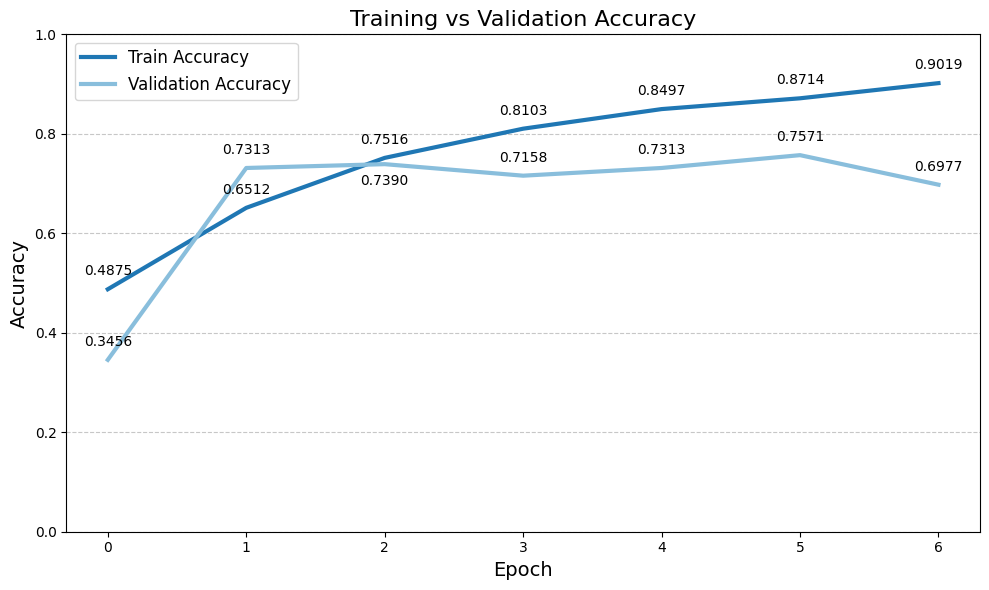

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract data from the logs
data = {
    'Epoch': [0, 1, 2, 3, 4, 5, 6],
    'Train Acc': [0.4875, 0.6512, 0.7516, 0.8103, 0.8497, 0.8714, 0.9019],
    'Val Acc': [0.3456 , 0.7313, 0.7390, 0.7158, 0.7313, 0.7571, 0.6977],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Print the table
print("Training Progress:")
print(df)

# Plot training accuracy and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(df['Epoch'], df['Train Acc'], label='Train Accuracy', linewidth=3, color='#1f77b4')
plt.plot(df['Epoch'], df['Val Acc'], label='Validation Accuracy', linewidth=3, color='#89bedc')

plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title("Training vs Validation Accuracy", fontsize=16)

# grid lines for y axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

# set y-axis limits
plt.ylim(0, 1)

# add values on top of points
for i, (train_acc, val_acc) in enumerate(zip(df['Train Acc'], df['Val Acc'])):
    if i == 2:  # adjust annotation positions for the 2nd epoch
        plt.annotate(f"{train_acc:.4f}", (df['Epoch'][i], train_acc), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10)
        plt.annotate(f"{val_acc:.4f}", (df['Epoch'][i], val_acc), textcoords="offset points", xytext=(0,-15), ha='center', fontsize=10)
    else:
        plt.annotate(f"{train_acc:.4f}", (df['Epoch'][i], train_acc), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10)
        plt.annotate(f"{val_acc:.4f}", (df['Epoch'][i], val_acc), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10)

plt.legend(fontsize=12)

# set a tight layout to minimize whitespace
plt.tight_layout()

plt.show()

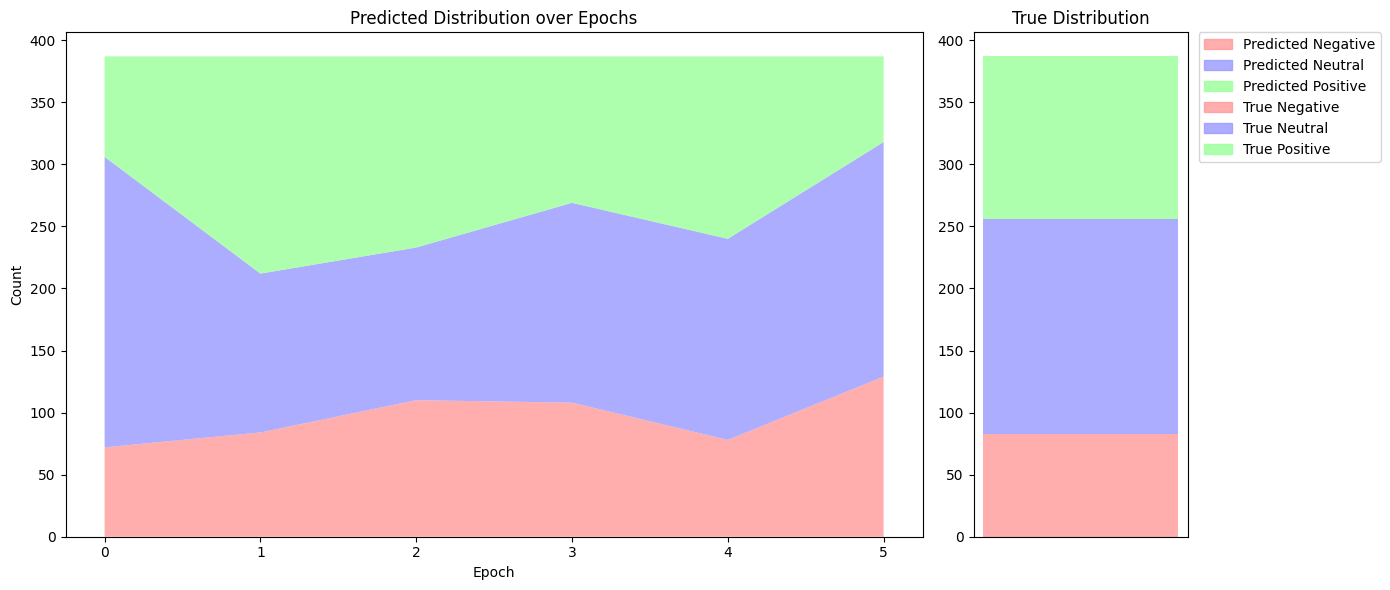

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract data from the logs
data = {
    'Epoch': [0, 1, 2, 3, 4, 5],
    'Train Loss': [0.7719, 0.5855, 0.4583, 0.3947, 0.3173, 0.2590],
    'Train Acc': [0.6512, 0.7516, 0.8103, 0.8497, 0.8714, 0.9019],
    'Val Acc': [0.7313, 0.7390, 0.7158, 0.7313, 0.7571, 0.6977],
    'Val Recall': [0.7126, 0.7558, 0.7490, 0.7542, 0.7577, 0.7209],
    'Val F1-macro': [0.7258, 0.7430, 0.7195, 0.7354, 0.7585, 0.6899],
    'Val y_true_negative': [83, 83, 83, 83, 83, 83],
    'Val y_true_neutral': [173, 173, 173, 173, 173, 173],
    'Val y_true_positive': [131, 131, 131, 131, 131, 131],
    'Val y_pred_negative': [72, 84, 110, 108, 78, 129],
    'Val y_pred_neutral': [234, 128, 123, 161, 162, 189],
    'Val y_pred_positive': [81, 175, 154, 118, 147, 69]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [4, 1]})

# Plot predicted distribution over epochs
epochs = df['Epoch']
pred_negative = df['Val y_pred_negative']
pred_neutral = df['Val y_pred_neutral']
pred_positive = df['Val y_pred_positive']

ax1.stackplot(epochs, pred_negative, pred_neutral, pred_positive,
              labels=['Predicted Negative', 'Predicted Neutral', 'Predicted Positive'],
              colors=['#ff9999', '#9999ff', '#99ff99'], alpha=0.8)

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Count')
ax1.set_title("Predicted Distribution over Epochs")

# Plot true distribution as a bar on the right side
true_negative = df['Val y_true_negative'][0]
true_neutral = df['Val y_true_neutral'][0]
true_positive = df['Val y_true_positive'][0]

ax2.bar(0, true_negative, color='#ff9999', alpha=0.8, label='True Negative')
ax2.bar(0, true_neutral, bottom=true_negative, color='#9999ff', alpha=0.8, label='True Neutral')
ax2.bar(0, true_positive, bottom=true_negative + true_neutral, color='#99ff99', alpha=0.8, label='True Positive')

ax2.set_ylim(ax1.get_ylim())  # Set the same y-limits as the stacked plot
ax2.set_xticks([])  # Remove x-ticks
ax2.set_title("True Distribution")

# Create a custom legend
labels = ['Predicted Negative', 'Predicted Neutral', 'Predicted Positive',
          'True Negative', 'True Neutral', 'True Positive']
colors = ['#ff9999', '#9999ff', '#99ff99'] * 2
markers = [plt.Rectangle((0, 0), 1, 1, color=c, alpha=0.8) for c in colors]
plt.legend(markers, labels, loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

plt.tight_layout()
plt.show()

Test Set Results:
      Metric  Value
    F1-macro 0.7279
Recall (avg) 0.7260
F1 (pos/neg) 0.7292
    Accuracy 0.7239


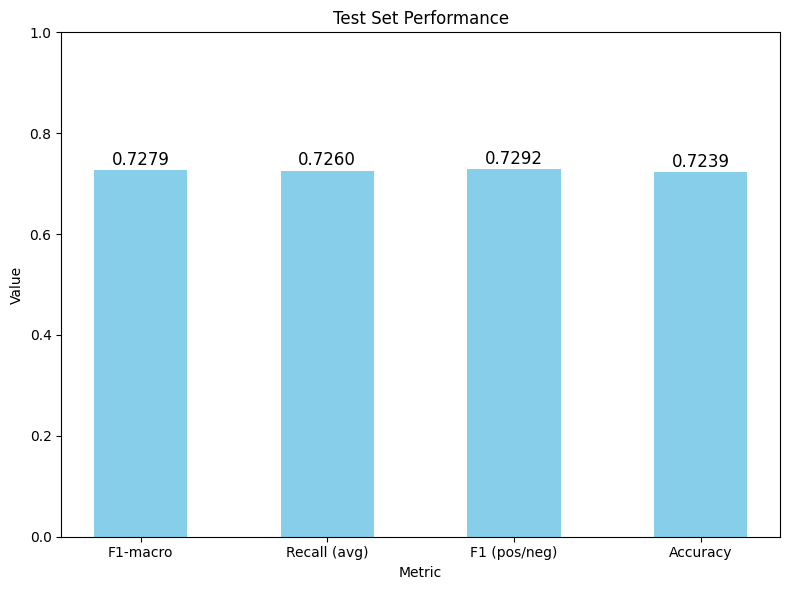

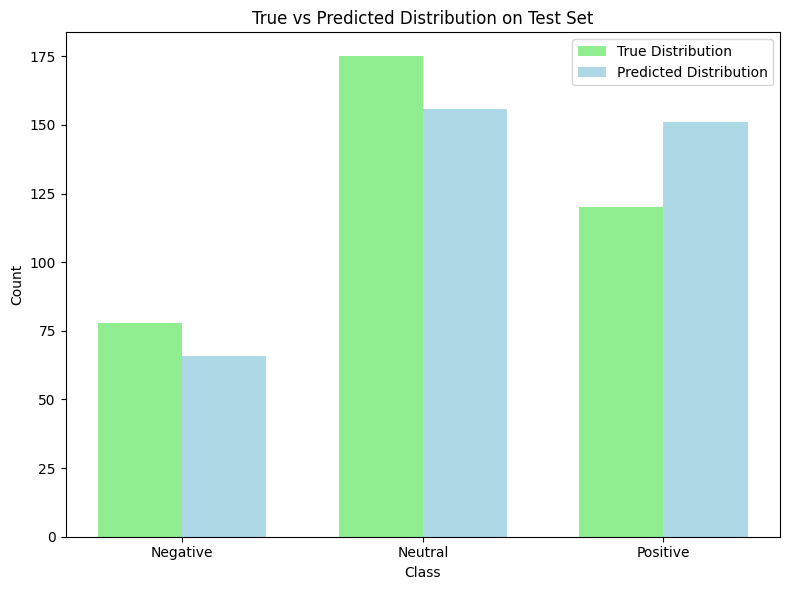

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a DataFrame with the test set results
data = {
    'Metric': ['F1-macro', 'Recall (avg)', 'F1 (pos/neg)', 'Accuracy'],
    'Value': [0.7279, 0.7260, 0.7292, 0.7239]
}
df = pd.DataFrame(data)

# Create a table
print("Test Set Results:")
print(df.to_string(index=False))

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(df['Metric'], df['Value'], color='skyblue', width=0.5)
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Test Set Performance')
plt.ylim(0, 1)
for i, v in enumerate(df['Value']):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', fontsize=12)
plt.tight_layout()
plt.show()

# Create a DataFrame with the true and predicted distributions
dist_data = {
    'Class': ['Negative', 'Neutral', 'Positive'],
    'True Distribution': [78, 175, 120],
    'Predicted Distribution': [66, 156, 151]
}
dist_df = pd.DataFrame(dist_data)

# Create a grouped bar plot for true and predicted distributions
plt.figure(figsize=(8, 6))
x = np.arange(len(dist_df))
width = 0.35
plt.bar(x - width/2, dist_df['True Distribution'], width, label='True Distribution', color='lightgreen')
plt.bar(x + width/2, dist_df['Predicted Distribution'], width, label='Predicted Distribution', color='lightblue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('True vs Predicted Distribution on Test Set')
plt.xticks(x, dist_df['Class'])
plt.legend()
plt.tight_layout()
plt.show()

Validation Accuracies:
   Epoch  Dual BERT  Bert Spc  Fast-LSA-T-V2
0      0      65.70     64.53          66.57
1      1      70.06     70.93          72.67
2      2      74.13     70.35          71.51
3      3      74.13     73.84          75.00
4      4      71.80     72.67          76.74
5      5      75.00     69.48          76.16


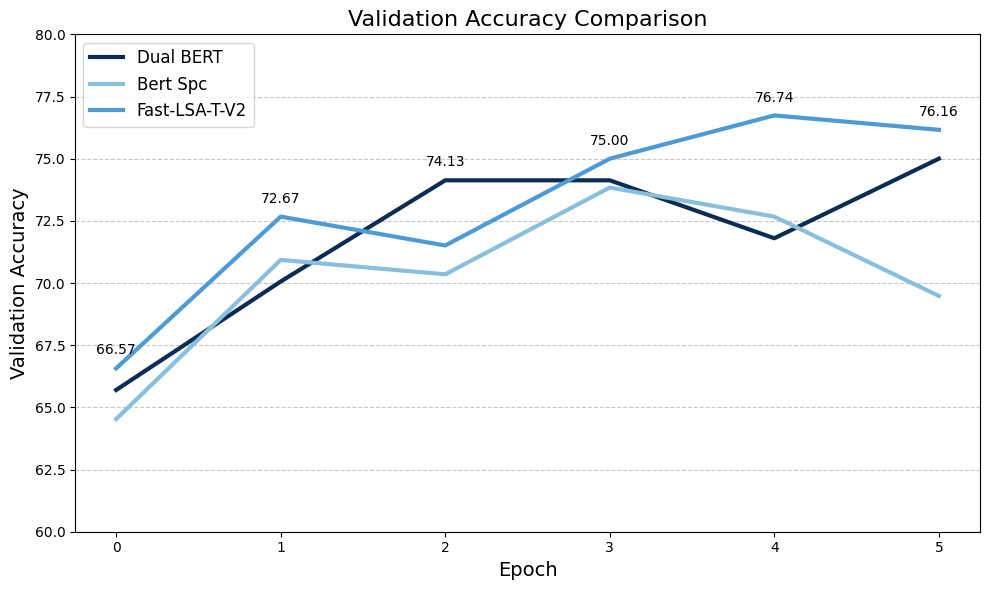

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract data from the logs
data = {
    'Epoch': [0, 1, 2, 3, 4, 5],
    'Dual BERT': [65.70, 70.06, 74.13, 74.13, 71.80, 75.00],
    'Bert Spc': [64.53, 70.93, 70.35, 73.84, 72.67, 69.48],
    'Fast-LSA-T-V2': [66.57, 72.67, 71.51, 75.00, 76.74, 76.16],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Print the table
print("Validation Accuracies:")
print(df)

# Plot validation accuracies for the three models
plt.figure(figsize=(10, 6))
plt.plot(df['Epoch'], df['Dual BERT'], label='Dual BERT', linewidth=3, color='#0c2c54')
plt.plot(df['Epoch'], df['Bert Spc'], label='Bert Spc', linewidth=3, color='#89bedc')
plt.plot(df['Epoch'], df['Fast-LSA-T-V2'], label='Fast-LSA-T-V2', linewidth=3, color='#4d9ad6')

plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Validation Accuracy', fontsize=14)
plt.title("Validation Accuracy Comparison", fontsize=16)

# grid lines for y axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

# set y-axis limits
plt.ylim(60, 80)

# add values on top of points
for i in range(len(df)):
    max_acc = max(df['Dual BERT'][i], df['Bert Spc'][i], df['Fast-LSA-T-V2'][i])
    if df['Dual BERT'][i] == max_acc:
        plt.annotate(f"{max_acc:.2f}", (df['Epoch'][i], max_acc), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10)
    elif df['Bert Spc'][i] == max_acc:
        plt.annotate(f"{max_acc:.2f}", (df['Epoch'][i], max_acc), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10)
    else:
        plt.annotate(f"{max_acc:.2f}", (df['Epoch'][i], max_acc), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10)

plt.legend(fontsize=12)

# set a tight layout to minimize whitespace
plt.tight_layout()

plt.show()

Model Performance:
    Epoch  Dev Acc  Dev F1
0       0    66.57   66.83
1       1    72.67   73.37
2       2    71.51   72.32
3       3    75.00   74.91
4       4    76.74   76.00
5       5    76.16   75.78
6       6    77.62   77.45
7       7    74.42   74.21
8       8    78.49   78.29
9       9    76.16   75.73
10     10    77.03   76.59
11     11    76.16   75.85
12     12    75.29   74.79
13     13    77.03   76.61
14     14    77.62   77.54


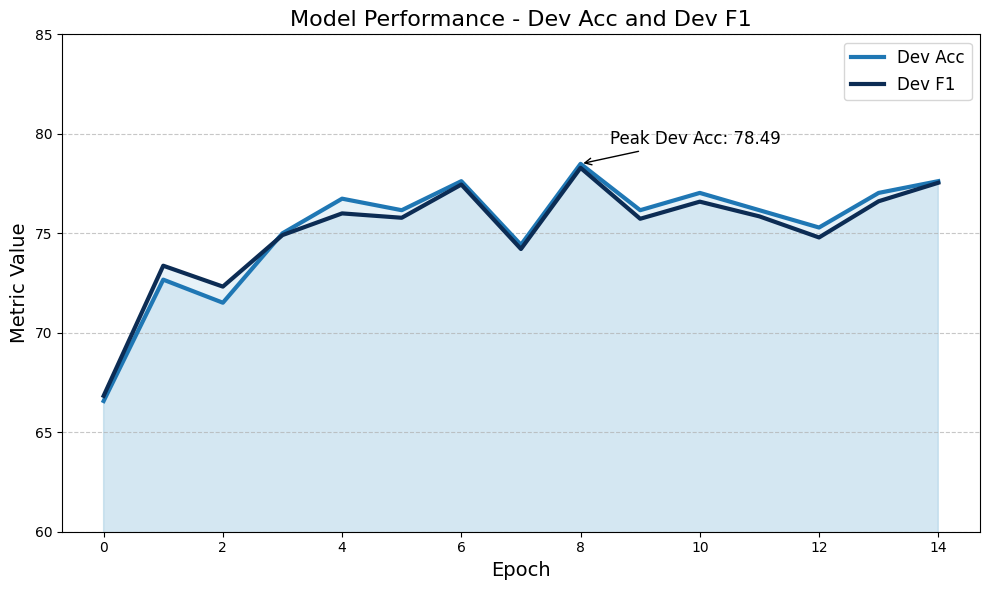

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract data from the logs
data = {
    'Epoch': list(range(15)),
    'Dev Acc': [66.57, 72.67, 71.51, 75.00, 76.74, 76.16, 77.62, 74.42, 78.49, 76.16, 77.03, 76.16, 75.29, 77.03, 77.62],
    'Dev F1': [66.83, 73.37, 72.32, 74.91, 76.00, 75.78, 77.45, 74.21, 78.29, 75.73, 76.59, 75.85, 74.79, 76.61, 77.54]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Print the table
print("Model Performance:")
print(df)

# Plot Dev Acc and Dev F1
plt.figure(figsize=(10, 6))
plt.plot(df['Epoch'], df['Dev Acc'], label='Dev Acc', linewidth=3, color='#1f77b4')
plt.plot(df['Epoch'], df['Dev F1'], label='Dev F1', linewidth=3, color='#0c2c54')

plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Metric Value', fontsize=14)
plt.title("Model Performance - Dev Acc and Dev F1", fontsize=16)

# grid lines for y axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

# set y-axis limits
plt.ylim(60, 85)

# add values on top of points

plt.legend(fontsize=12)
peak_epoch = df['Dev Acc'].idxmax()
peak_acc = df.loc[peak_epoch, 'Dev Acc']
plt.annotate(f"Peak Dev Acc: {peak_acc:.2f}", xy=(peak_epoch, peak_acc), xytext=(peak_epoch+0.5, peak_acc+1),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12)
# set a tight layout to minimize whitespace
plt.tight_layout()
plt.fill_between(df['Epoch'], df['Dev Acc'], alpha=0.2, color='#89bedc')
plt.fill_between(df['Epoch'], df['Dev F1'], alpha=0.2, color='#89bedc')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['Epoch'], df['Test Acc'], label='Test Accuracy', linewidth=3, color='#1f77b4')
plt.plot(df['Epoch'], df['Test Loss'], label='Test loss', linewidth=3, color='#89bedc')
plt.plot(df['Epoch'], df['Train loss'], label='Train Loss', linewidth=3, color='#ff7f0e')

plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title("Train & test results", fontsize=16)

# grid lines for y axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

Validation Accuracy Comparison:
   Epoch  Max Dev Acc LCFS_BERT  Max Dev Acc FAST_LSA_T_V2
0      0                  64.04                      62.75
1      1                  67.68                      63.84
2      2                  68.89                      67.47
3      3                  69.49                      69.70
4      4                  70.91                      69.70
5      5                  71.31                      70.10
6      6                  71.92                      71.31
7      7                  71.92                      72.32


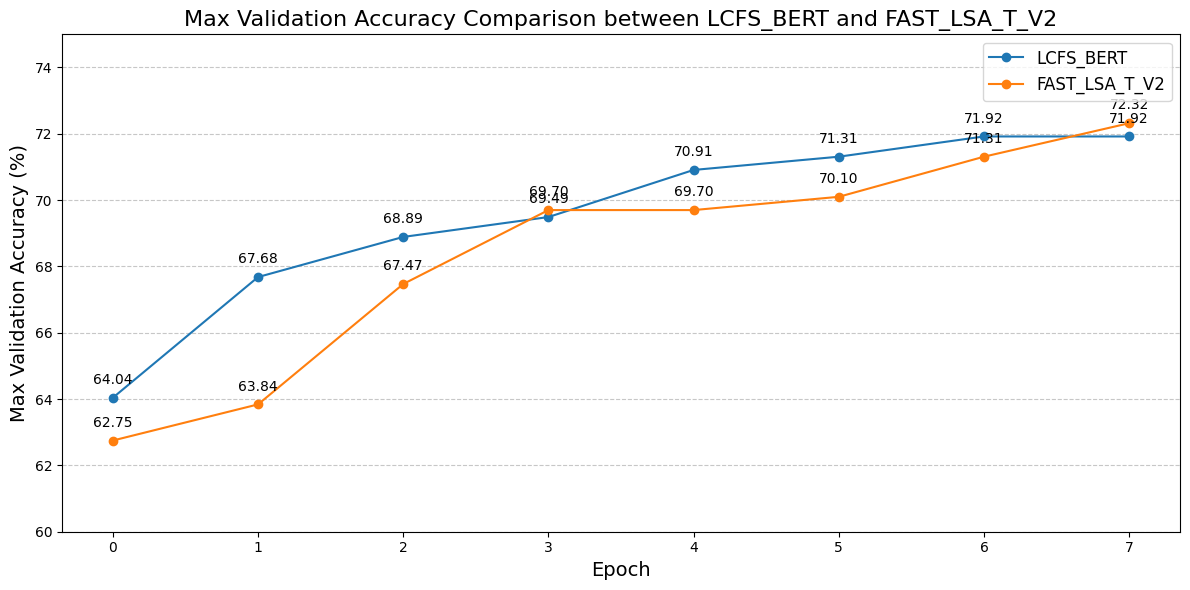

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for LCFS_BERT
lcfs_bert_data = {
    'Epoch': [0, 1, 2, 3, 4, 5, 6, 7],
    'Max Dev Acc LCFS_BERT': [64.04, 67.68, 68.89, 69.49, 70.91, 71.31, 71.92, 71.92]
}

# Data for FAST_LSA_T_V2
fast_lsa_t_v2_data = {
    'Epoch': [0, 1, 2, 3, 4, 5, 6, 7],
    'Max Dev Acc FAST_LSA_T_V2': [62.75, 63.84, 67.47, 69.70, 69.70, 70.10, 71.31, 72.32]
}

# Create DataFrames
lcfs_bert_df = pd.DataFrame(lcfs_bert_data)
fast_lsa_t_v2_df = pd.DataFrame(fast_lsa_t_v2_data)

# Merge DataFrames on Epoch
df = pd.merge(lcfs_bert_df, fast_lsa_t_v2_df, on='Epoch')

# Print the table
print("Validation Accuracy Comparison:")
print(df)

# Plot validation accuracy for both models
plt.figure(figsize=(12, 6))
plt.plot(df['Epoch'], df['Max Dev Acc LCFS_BERT'], label='LCFS_BERT', marker='o', color='#1f77b4')
plt.plot(df['Epoch'], df['Max Dev Acc FAST_LSA_T_V2'], label='FAST_LSA_T_V2', marker='o', color='#ff7f0e')

plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Max Validation Accuracy (%)', fontsize=14)
plt.title("Max Validation Accuracy Comparison between LCFS_BERT and FAST_LSA_T_V2", fontsize=16)

# grid lines for y axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

# set y-axis limits
plt.ylim(60, 75)

# add values on top of points
for i, (lcfs_acc, fast_acc) in enumerate(zip(df['Max Dev Acc LCFS_BERT'], df['Max Dev Acc FAST_LSA_T_V2'])):
    plt.annotate(f"{lcfs_acc:.2f}", (df['Epoch'][i], lcfs_acc), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10)
    plt.annotate(f"{fast_acc:.2f}", (df['Epoch'][i], fast_acc), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10)

plt.legend(fontsize=12)

# set a tight layout to minimize whitespace
plt.tight_layout()

plt.show()
